<a href="https://colab.research.google.com/github/mdelleani/neuro-next-bootcamp/blob/main/notebooks/02_advanced_ai_neurology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/mdelleani/neuro-next-bootcamp.git

Cloning into 'neuro-next-bootcamp'...
remote: Enumerating objects: 136, done.
remote: Counting objects: 100% (136/136), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 136 (delta 61), reused 49 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (136/136), 9.13 MiB | 14.31 MiB/s, done.
Resolving deltas: 100% (61/61), done.


# Applicazioni Avanzate dell'IA in Neurologia: Dalla Segmentazione Immagini ai LLM 🧠

**Sessione Interattiva | Parte II: Applicazioni Pratiche**

* **Docente:** M. Delleani
* **Orario:** 18:00 - 19:15

---

Benvenuti alla seconda parte della nostra sessione interattiva!

Mentre il titolo originale della sessione era focalizzato sulla generazione di dati sintetici, per questa demo pratica abbiamo scelto di esplorare due aree di frontiera dell'Intelligenza Artificiale con un impatto immediato e tangibile in Neurologia, più facilmente dimostrabili in un contesto di sessione interattiva:


1.  **Large Language Models (LLM) per l'Analisi Testuale:** Come i modelli di linguaggio possono elaborare e interpretare testo medico (es. cartelle cliniche, articoli scientifici) per estrarre informazioni chiave, riassumere o rispondere a domande.
2.  **Segmentazione di Immagini Mediche:** Come l'IA può aiutare a identificare e delineare automaticamente strutture o patologie (es. lesioni, tumori, regioni cerebrali) nelle immagini diagnostiche (RM, TC).

Queste applicazioni mostrano la versatilità e il potenziale dell'IA nel supportare la diagnosi, la ricerca e la gestione clinica in neurologia.

---

### 1. Large Language Models (LLM) per l'Analisi Testuale in Neurologia
I Large Language Models (LLM) sono modelli di IA addestrati su enormi quantità di testo per comprendere, generare e manipolare il linguaggio umano. Hanno rivoluzionato il modo in cui interagiamo con l'informazione e stanno mostrando un potenziale immenso anche nel settore medico.



#### 1.1. Applicazioni degli LLM in Medicina e Neurologia

- Riassunto di Cartelle Cliniche/Articoli: Estrarre i punti chiave da lunghi testi.

- Estrazione di Informazioni: Identificare sintomi, diagnosi, farmaci, dosaggi da testi non strutturati.

- Supporto Decisionale Clinico: Fornire informazioni basate sull'evidenza da banche dati mediche (con cautela).

- Generazione di Rapporti: Aiutare a redigere referti o documentazione.
Analisi di Testi Scientifici: Accelerare la revisione della letteratura.



#### 1.2. Interagire con LLM Generali e Specializzati

Avremo la possibilità di interagire con un server di inferenza ad alte prestazioni per LLMche ci permetterà di testare rapidamente modelli di linguaggio.

Useremo un approccio basato su API (Application Programming Interface), simulando una chiamata a un servizio esterno che ospita il modello.

**Esempio testo in Neurologia**

In [2]:
testo_clinico_neurologia = """
Paziente M.D., 72 anni, ricoverato per peggioramento delle difficoltà cognitive iniziate 6 mesi fa,
caratterizzate principalmente da deficit di memoria episodica, disorientamento temporale e spaziale.
L'esame neurologico evidenzia lieve disprassia costruttiva. La RM cerebrale mostra atrofia ippocampale
bilaterale e una modesta componente vascolare. CSF positivo per biomarker di Alzheimer (ridotta Aβ42, aumentata p-tau).
Diagnosi provvisoria: Demenza di tipo Alzheimer con componente vascolare. Iniziato trattamento con Donepezil 5mg/die.
Si programma follow-up tra 3 mesi.
"""

testo_articolo_neurologia = """
Uno studio recente ha esplorato l'efficacia di un nuovo anticorpo monoclonale, Aducanumab,
nel ridurre le placche amiloidi nel cervello di pazienti affetti da Alzheimer in fase precoce.
I risultati preliminari indicano una riduzione significativa del carico di amiloide,
tuttavia, la correlazione con il miglioramento clinico rimane oggetto di dibattito,
con alcuni pazienti che riportano eventi avversi come ARIA-E. La ricerca è stata pubblicata
su "Nature Neuroscience".
"""

print("Testo Clinico di Esempio:")
print(testo_clinico_neurologia)
print("\nTesto Articolo Scientifico di Esempio:")
print(testo_articolo_neurologia)

Testo Clinico di Esempio:

Paziente M.D., 72 anni, ricoverato per peggioramento delle difficoltà cognitive iniziate 6 mesi fa,
caratterizzate principalmente da deficit di memoria episodica, disorientamento temporale e spaziale.
L'esame neurologico evidenzia lieve disprassia costruttiva. La RM cerebrale mostra atrofia ippocampale
bilaterale e una modesta componente vascolare. CSF positivo per biomarker di Alzheimer (ridotta Aβ42, aumentata p-tau).
Diagnosi provvisoria: Demenza di tipo Alzheimer con componente vascolare. Iniziato trattamento con Donepezil 5mg/die.
Si programma follow-up tra 3 mesi.


Testo Articolo Scientifico di Esempio:

Uno studio recente ha esplorato l'efficacia di un nuovo anticorpo monoclonale, Aducanumab,
nel ridurre le placche amiloidi nel cervello di pazienti affetti da Alzheimer in fase precoce.
I risultati preliminari indicano una riduzione significativa del carico di amiloide,
tuttavia, la correlazione con il miglioramento clinico rimane oggetto di dibattito,

**Funzione per Chiamare un LLM (via API)**

Simuleremo una chiamata API al tuo server vLLM. Dovrai sostituire YOUR_VLLM_ENDPOINT e YOUR_MODEL_NAME con i dettagli reali del tuo setup vLLM.

In [3]:
%cd neuro-next-bootcamp

/content/neuro-next-bootcamp


In [4]:
testo_referto = testo_clinico_neurologia
informazioni_da_estrarre = "motivo vista, diagnosi, sintomi, trattamento consigliato, imaging, anamnesi"

In [5]:
from notebooks.utils import ask_generalist_llm, ask_specialized_llm
import asyncio

messages = [
    {"role": "system", "content": [{"type": "text", "text": "Sei un assistente medico neurologo."}]},
    {"role": "user", "content": [{"type": "text", "text": f"Dato il Referto: {testo_referto}\n\nEstrai: {informazioni_da_estrarre}"}]}
]

# Run one or the other
response = await ask_generalist_llm(messages)

print("Risposta del modello generalista:\n", response)


Risposta del modello generalista:
  - Motivo vista: peggioramento delle difficoltà cognitive iniziate 6 mesi fa.

- Diagnosi: Demenza di tipo Alzheimer con componente vascolare.

- Sintomi: deficit di memoria episodica, disorientamento temporale e spaziale, disprassia costruttiva.

- Trattamento consigliato: iniziato trattamento con Donepezil 5mg/die.

- Imaging: RM cerebrale mostra atrofia ippocampale bilaterale e una modesta componente vascolare.

- Anamnesi: paziente M.D., 72 anni.


In [6]:
response_specialized = await ask_specialized_llm(messages)

print("Risposta del modello specializzato:\n", response_specialized)



Risposta del modello specializzato:
 Ecco l'estrazione delle informazioni dal referto fornito:

*   **Motivo vista:** Peggioramento delle difficoltà cognitive iniziate 6 mesi fa.
*   **Diagnosi:** Demenza di tipo Alzheimer con componente vascolare.
*   **Sintomi:**
    *   Deficit di memoria episodica
    *   Disorientamento temporale
    *   Disorientamento spaziale
    *   Lieve disprassia costruttiva
*   **Trattamento consigliato:** Donepezil 5mg/die
*   **Imaging:** RM cerebrale mostra atrofia ippocampale bilaterale e una modesta componente vascolare.
*   **Anamnesi:**
    *   Paziente M.D., 72 anni
    *   Inizio dei sintomi cognitivi 6 mesi fa.
    *   CSF positivo per biomarker di Alzheimer (ridotta Aβ42, aumentata p-tau).

Spero che questa estrazione sia utile.


#### Few-shot prompting

Instruire il modello a rispondere come vogliamo dandogli alcuni esempi

In [8]:

# 2. Prompt few-shot + nuovo referto
few_shot_examples = """
Referto:
Paziente maschio di 52 anni con cefalea intensa, nausea e rigidità nucale. RM encefalo mostra emorragia subaracnoidea. Inizia trattamento in neurochirurgia. Diagnosi: emorragia subaracnoidea.

Risposta:
Diagnosi: Emorragia subaracnoidea
Sintomi principali: Cefalea intensa, nausea, rigidità nucale
Trattamento consigliato: Osservazione e valutazione neurochirurgica
Imaging anomalo: sì, emorragia subaracnoidea alla RM

---

Referto:
Donna di 74 anni con progressiva perdita di memoria, disorientamento temporale e alterazioni comportamentali. TC encefalo: atrofia diffusa. Diagnosi probabile: demenza di Alzheimer. Inizia trattamento con donepezil.

Risposta:
Diagnosi: Demenza di Alzheimer (probabile)
Sintomi principali: Perdita di memoria, disorientamento, alterazioni comportamentali
Trattamento consigliato: Donepezil
Imaging anomalo: sì, atrofia diffusa alla TC

---

Referto:
Paziente di 67 anni giunge in PS per insorgenza improvvisa di emiparesi destra e disartria. TC encefalo negativa. RM encefalo mostra lesione ischemica recente in territorio lenticolo-capsulare sinistro. Inizia trattamento con ASA e statine. Diagnosi: ictus ischemico in paziente ipertesa.

Risposta:
"""

esempi_few_shot = few_shot_examples.strip()
esempi_few_shot

'Referto:\nPaziente maschio di 52 anni con cefalea intensa, nausea e rigidità nucale. RM encefalo mostra emorragia subaracnoidea. Inizia trattamento in neurochirurgia. Diagnosi: emorragia subaracnoidea.\n\nRisposta:\nDiagnosi: Emorragia subaracnoidea\nSintomi principali: Cefalea intensa, nausea, rigidità nucale\nTrattamento consigliato: Osservazione e valutazione neurochirurgica\nImaging anomalo: sì, emorragia subaracnoidea alla RM\n\n---\n\nReferto:\nDonna di 74 anni con progressiva perdita di memoria, disorientamento temporale e alterazioni comportamentali. TC encefalo: atrofia diffusa. Diagnosi probabile: demenza di Alzheimer. Inizia trattamento con donepezil.\n\nRisposta:\nDiagnosi: Demenza di Alzheimer (probabile)\nSintomi principali: Perdita di memoria, disorientamento, alterazioni comportamentali\nTrattamento consigliato: Donepezil\nImaging anomalo: sì, atrofia diffusa alla TC\n\n---\n\nReferto:\nPaziente di 67 anni giunge in PS per insorgenza improvvisa di emiparesi destra e di

In [9]:


messages = [
    {"role": "system", "content": [{"type": "text", "text": "Sei un assistente medico neurologo."}]},
    {"role": "user", "content": [{"type": "text", "text": f"Ecco alcuni esempi:\n {esempi_few_shot}\n\nDato il Referto: {testo_referto}\n\nEstrai: {informazioni_da_estrarre}"}]},
]

# Run one or the other
response = await ask_generalist_llm(messages)

print("Risposta del modello generalista:\n", response)

Risposta del modello generalista:
  Motivo vista: peggioramento delle difficoltà cognitive
Diagnosi: Demenza di tipo Alzheimer con componente vascolare
Sintomi: deficit di memoria episodica, disorientamento temporale e spaziale, lieve disprassia costruttiva
Trattamento consigliato: Donepezil 5mg/die
Imaging: RM cerebrale con atrofia ippocampale bilaterale e componente vascolare, CSF positivo per biomarker di Alzheimer
Anamnesi: difficoltà cognitive iniziate 6 mesi fa, diagnosi provvisoria, seguita con follow-up tra 3 mesi


In [10]:
# Run one or the other
response = await ask_specialized_llm(messages)

print("Risposta del modello generalista:\n", response)

Risposta del modello generalista:
 Ecco l'estrazione delle informazioni dal referto fornito:

*   **Motivo vista:** Peggioramento delle difficoltà cognitive iniziate 6 mesi fa.
*   **Diagnosi:** Demenza di tipo Alzheimer con componente vascolare.
*   **Sintomi:** Deficit di memoria episodica, disorientamento temporale e spaziale, lieve disprassia costruttiva.
*   **Trattamento consigliato:** Donepezil 5mg/die.
*   **Imaging:** Atrofia ippocampale bilaterale e una modesta componente vascolare (sulla RM cerebrale).
*   **Anamnesi:** Iniziato 6 mesi fa, peggioramento delle difficoltà cognitive.

**Riepilogo:**

*   **Motivo vista:** Peggioramento delle difficoltà cognitive.
*   **Diagnosi:** Demenza di tipo Alzheimer con componente vascolare.
*   **Sintomi:** Deficit di memoria episodica, disorientamento temporale e spaziale, lieve disprassia costruttiva.
*   **Trattamento consigliato:** Donepezil 5mg/die.
*   **Imaging:** Atrofia ippocampale bilaterale e una modesta componente vascolare.

#### Forziamo le strutturazioni dell'output

In [13]:
from pydantic import BaseModel
from enum import Enum


class Diagnosi(str, Enum):
    alzheimer = "alzheimer"
    mielodisplasia = "mielodisplasia"
    leucemia = "leucemia"

class PatientDescription(BaseModel):
    name: str
    age: str
    diagnosi: Diagnosi
    sintomi: str

json_schema = PatientDescription.model_json_schema()


response_format = {
                    "type": "json_schema",
                    "json_schema": {
                        "name": "car-description",
                        "schema": PatientDescription.model_json_schema()
                    },
                  }


In [14]:

messages = [
    {"role": "system", "content": [{"type": "text", "text": "Sei un assistente medico neurologo."}]},
    {"role": "user", "content": [{"type": "text", "text": f"Dato il Referto: {testo_referto}\n\nEstrai: {informazioni_da_estrarre}"}]},
]

# Run one or the other
response = await ask_generalist_llm(messages, response_format)

print("Risposta del modello generalista con strutturs:\n", response)

Risposta del modello generalista con strutturs:
 {

"name": "M.D.",

"age": "72",

"diagnosi": "alzheimer",

"sintomi": "difficoltà di memoria episodica, disorientamento temporale e spaziale, lieve disprassia costruttiva, atrofia ippocampale ipsilaterale, deficit vascolari bilaterali, CSF positivo per biomarker di Alzheimer (ridotta Aβ42, aumentata p-tau)."

}


#### MedGemma: multimodalità (immagini e testo)

In [22]:
import os
from PIL import Image
from IPython.display import Image as IPImage, display, Markdown

prompt = "Descrivi questa MRI"  # @param {type: "string"}

# Image attribution: Stillwaterising, CC0, via Wikimedia Commons
image_url = "https://alzheimersnewstoday.com/wp-content/uploads/2014/10/WhiteMatterHyperintensities.jpg" # "https://upload.wikimedia.org/wikipedia/commons/c/c8/Chest_Xray_PA_3-8-2010.png"  # @param {type: "string"}
! wget -nc -q {image_url}
image_filename = os.path.basename(image_url)
image = Image.open(image_filename)

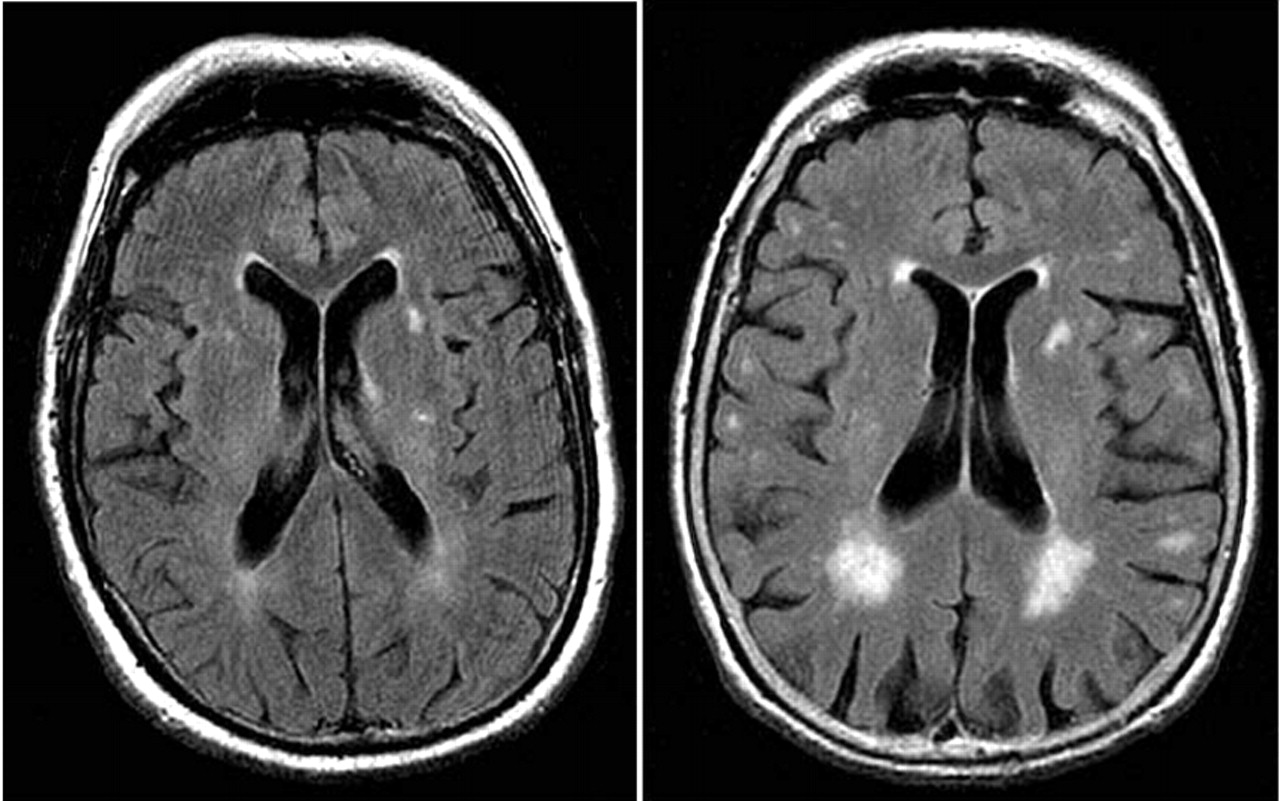

In [23]:
display(IPImage(filename=image_filename, height=300))


In [24]:
system_instruction = "Sei un esperto neurologo."

messages = [
    {
        "role": "system",
        "content": [{"type": "text", "text": system_instruction}]
    },
    {
        "role": "user",
        "content": [
            {"type": "text", "text": prompt},
            {"type": "image_url", "image_url": {"url": image_url}}
        ]
    }
]

In [28]:
response = await ask_specialized_llm(messages)


---

**[ User ]**

Descrivi questa MRI

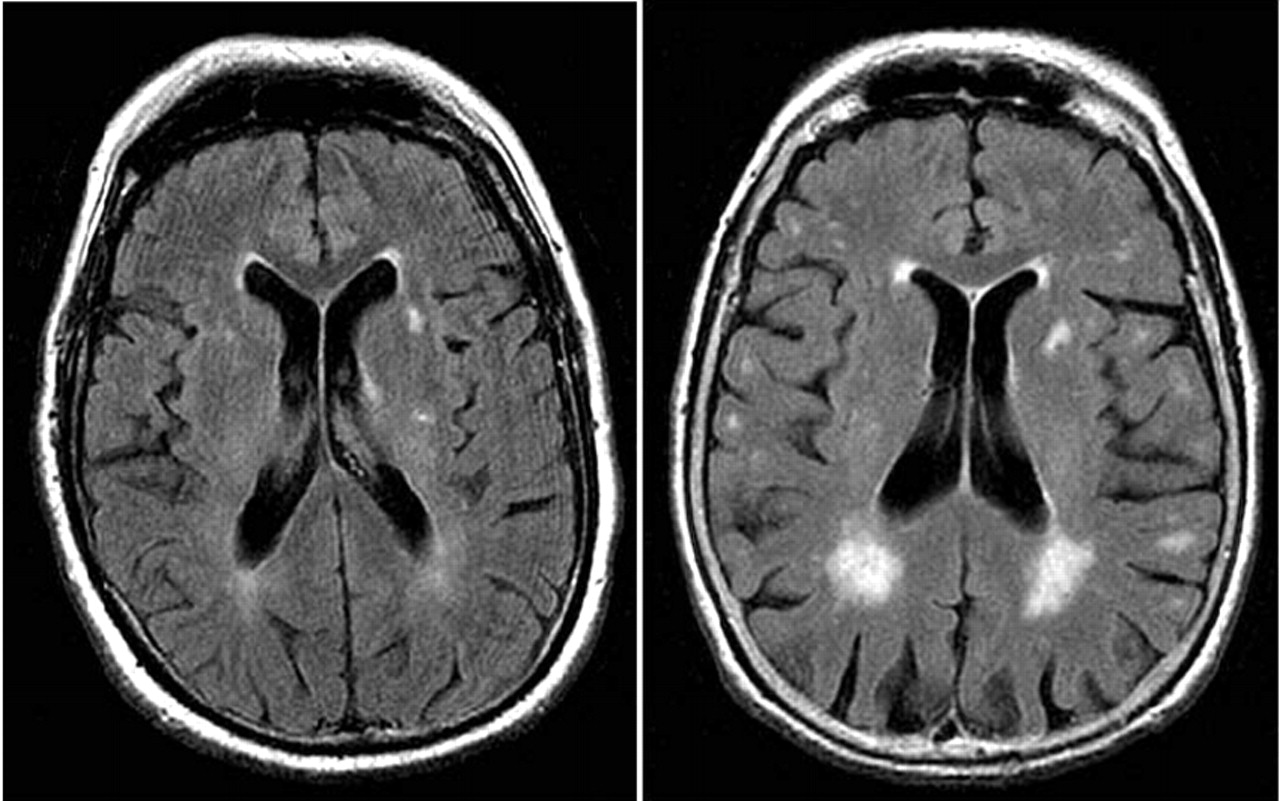

---

**[ MedGemma ]**

Basandomi sull'immagine fornita, posso descrivere le seguenti caratteristiche:

**Aspetto generale:**

*   L'immagine mostra una sezione di risonanza magnetica (MRI) del cervello.
*   Le immagini sembrano essere in fase di acquisizione o di elaborazione, poiché le aree bianche e scure non sono ancora definite.

**Caratteristiche specifiche (basate sull'apparenza):**

*   **Presenza di aree bianche:** Sono visibili aree di intensità più chiara (bianco) all'interno del cervello, in particolare nelle aree circostanti i ventricoli. Queste aree bianche potrebbero rappresentare:
    *   **Lesioni infiammatorie:** In caso di sclerosi multipla o altre malattie infiammatorie del cervello.
    *   **Ictus:** Se ci sono aree di danno cerebrale a seguito di un'occlusione di un vaso sanguigno.
    *   **Infezioni:** Come la toxoplasmosi o la sarcoidosi.
    *   **Lesioni vascolari:** Danni ai vasi sanguigni del cervello.
    *   **Edema:** Accumulo di liquido nel cervello.
*   **Ventricoli:** I ventricoli cerebrali (spazi pieni di liquido) appaiono visibili, ma potrebbero essere leggermente aumentati di volume a causa dell'edema.
*   **Strutture cerebrali:** Le strutture principali del cervello, come il tronco encefalico e le aree corticali, sembrano essere presenti e relativamente ben definite.

**Considerazioni importanti:**

*   **Interpretazione definitiva:** Questa è solo una descrizione preliminare basata sull'apparenza dell'immagine. Per una diagnosi accurata, è necessario:
    *   **Analizzare l'intera sequenza di immagini:** Un radiologo esperto deve valutare l'intera sequenza di immagini, inclusi diversi piani e tipi di sequenze (T1, T2, FLAIR, DWI, ecc.).
    *   **Considerare la storia clinica del paziente:** Le caratteristiche dell'immagine devono essere interpretate nel contesto della storia clinica del paziente, dei sintomi e dei risultati di altri esami.
    *   **Confrontare con immagini precedenti:** Se disponibili, è importante confrontare l'immagine

---

In [29]:
if response:

  display(Markdown(f"---\n\n**[ User ]**\n\n{prompt}"))
  display(IPImage(filename=image_filename, height=300))
  display(Markdown(f"---\n\n**[ MedGemma ]**\n\n{response}\n\n---"))


## 2. Segmentazione di Immagini in Neurologia: Identificare e Delineare

La **segmentazione di immagini** è una tecnica di visione artificiale che consiste nel suddividere un'immagine in regioni o oggetti con proprietà simili. In medicina, è fondamentale per:

* **Quantificazione:** Misurare il volume di lesioni, tumori o atrofia cerebrale.
* **Navigazione Chirurgica:** Delineare le aree di interesse per interventi precisi.
* **Diagnosi:** Aiutare a identificare e localizzare patologie.


### 2.1. MedSAM: Un Modello Fondamentale per la Segmentazione Medica

**MedSAM (Medical Segment Anything Model)** è un esempio di "foundation model" adattato al dominio medico. Nasce dal successo del modello Segment Anything Model (SAM) di Meta AI, addestrato su una quantità enorme di immagini generiche. MedSAM è stato poi specializzato per riconoscere e segmentare una vasta gamma di strutture anatomiche e patologie nelle immagini mediche con notevole accuratezza, anche con pochi esempi o con input minimi (es. un singolo punto).

**Nota importante per la demo:** L'esecuzione di MedSAM su immagini complesse può richiedere risorse computazionali significative (GPU dedicate e RAM). Per questa sessione, dimostreremo il concetto se le risorse di Colab lo permettono in tempo reale per un esempio semplificato, eseguiremo una versione più leggera o un modello simile.

#### **Esempio Concettuale di Segmentazione**

Simuleremo il caricamento di un'immagine di risonanza magnetica cerebrale e visualizzeremo un esempio di segmentazione di una lesione.


In [33]:
#@title Data download
#url = "https://drive.google.com/drive/folders/15hE_hEevLcIEq5Sf8hLotlMlA1KH_q06?usp=sharing"
#import gdown
#gdown.download_folder(url, quiet=True)

In [1]:
!git clone https://github.com/mdelleani/neuro-next-bootcamp.git

fatal: destination path 'neuro-next-bootcamp' already exists and is not an empty directory.


In [2]:
#@title Environment setup
!pip install torch==2.4.1 torchvision==0.19.1 --index-url https://download.pytorch.org/whl/cu121
!pip install jax==0.4.33
!pip install numpy==1.24

!pip install open_clip_torch==2.23.0
!pip install git+https://github.com/openai/CLIP.git
!pip install grad_cam==1.4.6
!pip install transformers==4.35.2

Looking in indexes: https://download.pytorch.org/whl/cu121
  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-weaqavvz
  Running command git clone --filter=blob:none --quiet https://github.com/openai/CLIP.git /tmp/pip-req-build-weaqavvz
  Resolved https://github.com/openai/CLIP.git to commit dcba3cb2e2827b402d2701e7e1c7d9fed8a20ef1
  Preparing metadata (setup.py) ... done


In [3]:
# get repo and install env
!git clone https://github.com/HealthX-Lab/MedCLIP-SAMv2

import torch
import torchvision

print("PyTorch version:", torch.__version__)
print("Torchvision version:", torchvision.__version__)
print("CUDA is available:", torch.cuda.is_available())
import sys
!{sys.executable} -m pip install opencv-python matplotlib
!{sys.executable} -m pip install 'git+https://github.com/facebookresearch/segment-anything.git'

!wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth


Cloning into 'MedCLIP-SAMv2'...
remote: Enumerating objects: 680, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (14/14), done.
remote: Total 680 (delta 31), reused 25 (delta 25), pack-reused 641 (from 1)
Receiving objects: 100% (680/680), 13.94 MiB | 25.27 MiB/s, done.
Resolving deltas: 100% (207/207), done.
PyTorch version: 2.4.1+cu121
Torchvision version: 0.19.1+cu121
CUDA is available: False
  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-frmp8d7_
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-frmp8d7_
  Resolved https://github.com/facebookresearch/segment-anything.git to commit dca509fe793f601edb92606367a655c15ac00fdf
  Preparing metadata (setup.py) ... done
--2025-06-28 11:19:40--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 3.167.112

In [4]:
%cd MedCLIP-SAMv2/saliency_maps

/content/MedCLIP-SAMv2/saliency_maps


In [5]:
import warnings
warnings.filterwarnings('ignore')
import os
import torch
import clip
import cv2
import sys
import numpy as np
from pytorch_grad_cam.utils.image import show_cam_on_image
import matplotlib.pyplot as plt

from transformers import CLIPProcessor
from scripts.plot import generate_shades_with_alpha, plot_text_with_colors, visualize_vandt_heatmap
from scripts.methods import vision_heatmap_iba, text_heatmap_iba
from transformers import AutoModel, AutoProcessor, AutoTokenizer
from PIL import Image, ImageOps
os.environ["TOKENIZERS_PARALLELISM"] = "false"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def plot(model, image, text, vbeta=0.1, vvar=1, vlayer=9, tbeta=0.1, tvar=1, tlayer=9):
    # Preprocess image
    image = Image.open(image).convert('RGB')
    image_feat = processor(images=image, return_tensors="pt")['pixel_values'].to(device) # 3*224*224
    # Tokenize text
    text_ids = torch.tensor([tokenizer.encode(text, add_special_tokens=True)]).to(device)
    text_words = tokenizer.convert_ids_to_tokens(text_ids[0].tolist())
    # Train information bottleneck on image
    print("Training M2IB on the image...")
    vmap = vision_heatmap_iba(text_ids, image_feat, model, vlayer, vbeta, vvar)
    # Train information bottleneck on text
    print("Training M2IB on the text...")
    tmap = text_heatmap_iba(text_ids, image_feat, model, tlayer, tbeta, tvar)
    # Just for demonstration purposes
    image_under = processor2(images=image, return_tensors="pt", do_normalize=False)['pixel_values'][0].permute(1,2,0)
    visualize_vandt_heatmap(tmap, vmap, text_words, image_under)
    img = np.array(image)
    vmap = cv2.resize(np.array(vmap),(img.shape[1],img.shape[0]),interpolation=cv2.INTER_NEAREST)*255
    return vmap

def overlay_segmentation(rgb_image, segmentation, alpha=0.4):
    """
    Overlays a red segmentation mask on top of a grayscale-looking RGB image.

    Parameters:
        rgb_image (PIL.Image.Image): RGB image loaded with PIL (even if it looks grayscale).
        segmentation (np.ndarray): 2D binary array (same width/height as image) where mask == 1 indicates the segmented area.
        alpha (float): Transparency of the segmentation overlay.
    """
    if not isinstance(rgb_image, Image.Image):
        raise TypeError("rgb_image must be a PIL.Image.Image object")

    image_np = np.array(rgb_image).astype(np.float32) / 255.0  # Normalize to [0,1]
    # print(image_np.shape)
    # print(segmentation.shape)

    if segmentation.shape != image_np.shape[:2]:
        raise ValueError("Segmentation mask must have the same width and height as the image")

    # Create red overlay where segmentation is 1
    red_mask = np.zeros_like(image_np)
    red_mask[..., 0] = 1  # Set red channel

    # Blend the red mask with the image where segmentation is 1
    overlay = np.where(segmentation[..., None].astype(bool),
                       (1 - alpha) * image_np + alpha * red_mask,
                       image_np)

    # Plot
    plt.figure(figsize=(6, 6))
    plt.imshow(overlay)
    plt.axis('off')
    plt.show()

In [6]:
model = AutoModel.from_pretrained("chuhac/BiomedCLIP-vit-bert-hf", trust_remote_code=True).to(device)
processor = AutoProcessor.from_pretrained("chuhac/BiomedCLIP-vit-bert-hf", trust_remote_code=True)
processor2 = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")
tokenizer = AutoTokenizer.from_pretrained("chuhac/BiomedCLIP-vit-bert-hf", trust_remote_code=True)

config.json: 0.00B [00:00, ?B/s]

configuration_biomed_clip.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/chuhac/BiomedCLIP-vit-bert-hf:
- configuration_biomed_clip.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.
`model_type` is found in both `text_config_dict` and `text_config` but with different values. The value `text_config_dict["model_type"]` will be used instead.
`model_type` is found in both `vision_config_dict` and `vision_config` but with different values. The value `vision_config_dict["model_type"]` will be used instead.


modeling_biomed_clip.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/chuhac/BiomedCLIP-vit-bert-hf:
- modeling_biomed_clip.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


model.safetensors:   0%|          | 0.00/784M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/394 [00:00<?, ?B/s]

`model_type` is found in both `text_config_dict` and `text_config` but with different values. The value `text_config_dict["model_type"]` will be used instead.
`model_type` is found in both `vision_config_dict` and `vision_config` but with different values. The value `vision_config_dict["model_type"]` will be used instead.


processing_biomed_clip.py: 0.00B [00:00, ?B/s]

A new version of the following files was downloaded from https://huggingface.co/chuhac/BiomedCLIP-vit-bert-hf:
- processing_biomed_clip.py
. Make sure to double-check they do not contain any added malicious code. To avoid downloading new versions of the code file, you can pin a revision.


tokenizer.json: 0.00B [00:00, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

In [8]:
!pwd

/content/MedCLIP-SAMv2/saliency_maps


In [10]:
!file /content/neuro-next-bootcamp/data/brain.jpg


/content/neuro-next-bootcamp/data/brain.jpg: JPEG image data, JFIF standard 1.01, aspect ratio, density 1x1, segment length 16, progressive, precision 8, 589x590, components 1


Training M2IB on the image...


Training Bottleneck: 100%|██████████| 10/10 [03:08<00:00, 18.84s/it]


Training M2IB on the text...


Training Bottleneck: 100%|██████████| 10/10 [03:07<00:00, 18.79s/it]


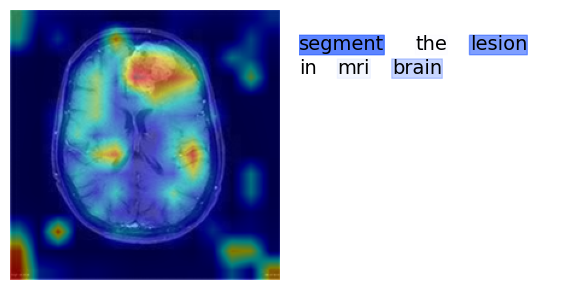

In [13]:
# @title ## Saliency Maps
image_path = "/content/neuro-next-bootcamp/data/brain.jpg" # @param {type:"string"}
text = "segment the lesion in mri brain" # @param {type:"string"}
vmap = plot(model, image_path, text)

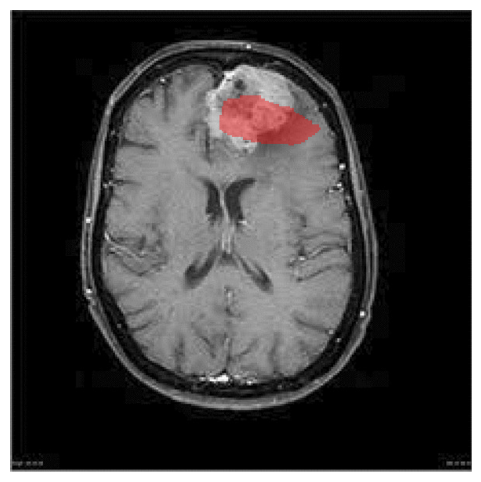

In [12]:
# @title ## Postprocessing

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2,random_state=10)
attn_weights = vmap / 255
# Keep only high attention weight scores
h, w = attn_weights.shape
attn_wg_threshold = 0.9 #@param {type:"slider", min:0.1, max:1.0, step:0.05}
filtered_attn_weights = attn_weights > attn_wg_threshold
attn_weights = attn_weights*filtered_attn_weights
image = cv2.resize(attn_weights, (256, 256),interpolation=cv2.INTER_NEAREST)
flat_image = image.reshape(-1, 1)

labels = kmeans.fit_predict(flat_image)

segmented_image = labels.reshape(256, 256)

centroids = kmeans.cluster_centers_.flatten()

# Identify the background cluster (assuming it has the lowest centroid value)
background_cluster = np.argmin(centroids)

# Mark background pixels as 0 and foreground pixels as 1
segmented_image = np.where(segmented_image == background_cluster, 0, 1)

segmented_image = cv2.resize(segmented_image, (w,h),interpolation=cv2.INTER_NEAREST)
segmented_image = segmented_image.astype(np.uint8)*255

nb_blobs, im_with_separated_blobs, stats, _ = cv2.connectedComponentsWithStats(segmented_image)
sizes = stats[:, cv2.CC_STAT_AREA]

# Sort sizes (ignoring the background at index 0)
sorted_sizes = sorted(sizes[1:], reverse=True)

# Change this here if you want to segment more than one contour
num_contours = 1

# Determine the top K sizes
top_k_sizes = sorted_sizes[:num_contours]

im_result = np.zeros_like(im_with_separated_blobs)

for index_blob in range(1, nb_blobs):
    if sizes[index_blob] in top_k_sizes:
        im_result[im_with_separated_blobs == index_blob] = 255

segmented_image = im_result

cv2.imwrite("/content/MedCLIP-SAMv2/postprocessed_map.png", segmented_image)

# plt.imshow(segmented_image,cmap="gray")
overlay_segmentation(rgb_image=Image.open(image_path).convert('RGB'), segmentation=segmented_image)